# Deep Learning Fundamentals<br />
<h2><p style="color:darkred">1.1 - Introduction to NumPy</p></h2>

In [1]:
# Basic import function
import numpy as np

<strong>NumPy</strong> can be used to manipulate homogeneous, multi-dimensional arrays of objects (typically numbers):

In [2]:
# Create and print a simple 2x2 array of numbers
x = np.asarray([[0.5, 1, 2], [0, 1, 0.3]])
print(x)

[[0.5 1.  2. ]
 [0.  1.  0.3]]


<p>NumPy is at the heart of the popularity of Python for data science, as it provides a unified library for handling numerical objects, with the possibility of using several back-ends to improve its performance.</p>

An array is described by the type of its elements, and its shape:

In [3]:
print(x.dtype)
print(x.shape)

float64
(2, 3)


<em>Slices</em> of an array are created by indexing the array:

In [4]:
print(x[0, 0])     # Single value

0.5


In [5]:
print(x[0, 0:2])   # Range of values: from idx 0 to idx 2 (excluded)

[0.5 1. ]


In [6]:
print(x[0, 0:3:2]) # Range of values (with step)

[0.5 2. ]


In [7]:
print(x[:, :-2])  # Backward indexing with ellipsis on first value

[[0.5]
 [0. ]]


<div class="alert alert-warning">
An assignment is not a copy of the original array, but a view:
</div>

In [8]:
A = np.ones((3, 2))
B = A[0, :]
B[0] = 2
print(A)

[[2. 1.]
 [1. 1.]
 [1. 1.]]


In [9]:
# Deep copy of the object
A = np.ones((3, 2))
B = np.copy(A[0, :])
B[0] = 2
print(A)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [10]:
# Generate a range:
np.arange(0, 5, 0.5) # From 0 to 5 (excluded) by steps of 0.5
# np.linspace(0, 10, 25)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [11]:
np.random.rand(10) # Random numbers in [0, 1]

array([0.48050199, 0.12029112, 0.37563916, 0.34570118, 0.86541814,
       0.23115357, 0.47174992, 0.11301212, 0.07863325, 0.74333454])

In [12]:
np.random.randn(10) # Random numbers according to a normal distribution

array([-0.49124976,  0.73496029,  1.5906495 , -0.36611875, -0.31273033,
        1.50161956,  0.03173897, -0.48292576,  0.83715384, -0.54603342])

Mathematical operations in NumPy are generally defined elementwise. Consider the following operation:

In [14]:
a = np.random.rand(3, 1)
b = np.random.rand(3, 1)
a*b

array([[0.17467095],
       [0.17548185],
       [0.2975149 ]])

The previous operation is the Hadamard product $ \boldsymbol{a} \odot \boldsymbol{b}$, not the inner product $ \boldsymbol{a}^T\boldsymbol{b}$, which is obtained as:

In [16]:
a.T.dot(b)

array([[0.64766769]])

Elementwise comparison can be used for <em>logical</em> indexing of an array:

In [17]:
A = np.asarray([[1, 2], [3, 1]])
A[A > 1] = 0
print(A)

[[1 0]
 [0 1]]


<p>An essential aspect of NumPy is <strong>broadcasting</strong>. When applying an operation, singleton dimensions are broadcasted by copying the array along that dimension:</p>

In [18]:
a = np.asarray([2, 1])
b = np.asarray([[0], [3]])
print(a + b)

[[2 1]
 [5 4]]


In order to understand broadcasting, we can compare dimensions from the rightmost one:

<strong>a</strong>: 2 x 1 --> 2nd dimension is broadcasted<br />
<strong>b</strong>: 1 x 2 --> 1st dimension is broadcasted

<center>
<img src="./Images/fig_broadcast_visual_1.png" />
</center>
[Image Source](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html)

More difficult example:

In [19]:
A = np.random.rand(3, 1, 2)
B = np.random.rand(10, 1)
print((A*B).shape)

(3, 10, 2)


NumPy also provides several functions to extract statistics on the entire array:

In [20]:
print(A.mean()) # A.max, A.min, A.var, A.std, A.cumprod, A.cumsum, ...

0.6480589963254042


The functions can operate along specified dimensions:

In [21]:
print(A.mean(axis=0))

[[0.53122507 0.76489292]]


<h2><p style="color:darkred">1.2 - Basic plotting with Matplotlib</p></h2>

<p><strong>Matplotlib</strong> is the basic 2D plotting environment in Python. First, we use a magic command to force <em>inline</em> graphics:</p> 

In [22]:
%matplotlib inline

The module <code>pyplot</code> provides a MATLAB-like interface to create plots:

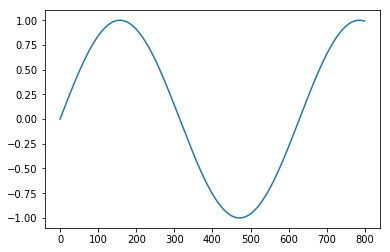

In [23]:
import matplotlib.pyplot as plt
plt.figure()
x = np.arange(0, 8, 0.01)
plt.plot(np.sin(x))
plt.show()

We can customize the lines using a simple syntax:

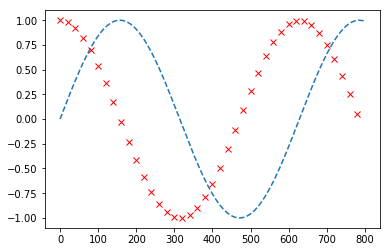

In [24]:
plt.plot(np.sin(x), '--')  # Dashed line
plt.plot(np.cos(x), 'xr', markevery=20)  # Cross marker, red color
plt.show()

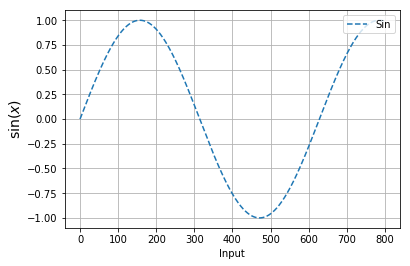

In [25]:
plt.plot(np.sin(x), '--')
plt.xlabel('Input')                      # Set x-label
plt.ylabel('$\sin(x)$', fontsize=14)     # Set y-label (with LaTeX)
plt.legend(['Sin'], loc='upper right')   # Legend
plt.grid()                               # Grid inside the figure

<center>
<img src="./Images/anatomy1.png" />
</center>

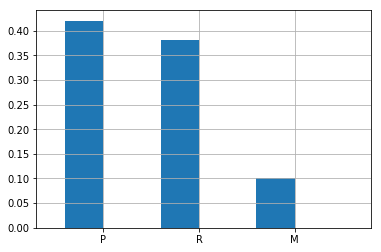

In [26]:
# Bar plot
fig, ax = plt.subplots()
plt.bar(np.asarray([1,2,3]) ,np.asarray([0.42, 0.38, 0.1]), width=0.4)
plt.xlim((0.5, 4))
ax.set_xticks((1.2, 2.2, 3.2))
ax.set_xticklabels(('P', 'R', 'M'))
plt.grid()

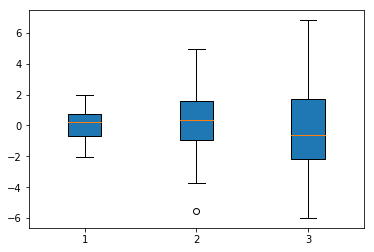

In [27]:
# Box plot
# See here: http://matplotlib.org/examples/statistics/boxplot_color_demo.html
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]
plt.boxplot(all_data, vert=True, patch_artist=True)   # fill with color
plt.show()

<h2><p style="color:darkred">1.3 - Advanced loading</p></h2>

<p><strong>Pandas</strong> is an advanced library for loading and transforming data. It provides standard Excel and SQL operations such as filtering, joining, merging, and many others.</p>
<p>It naturally interacts with NumPy, so that it can be used easily in any ML pipeline.</p>

We create some fake information on a CSV related to some clients' transactions:

In [29]:
import csv
with open('transactions.csv', 'w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    writer.writerow(['Client', 'Product', 'Quantity', 'Date'])
    writer.writerow(['A', 'T-shirt', 2, '01/01/2014'])
    writer.writerow(['B', 'Computer', 1, '02/02/2014'])
    writer.writerow(['A', 'Pen', 7, '05/01/2015'])

And another file storing information on the clients:

In [30]:
import csv
with open('clients.csv', 'w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    writer.writerow(['ID', 'First name', 'Last name'])
    writer.writerow(['A', 'Mario', 'Rossi'])
    writer.writerow(['B', 'Franco', 'Neri'])

In [31]:
# Reading the data in Pandas is awfully easy
import pandas as pd
t = pd.read_csv('transactions.csv', parse_dates=['Date'])
c = pd.read_csv('clients.csv').set_index('ID')
t

,Client,Product,Quantity,Date
0,A,T-shirt,2,2014-01-01
1,B,Computer,1,2014-02-02
2,A,Pen,7,2015-05-01


Indexing over rows is achieved like in NumPy arrays:

In [32]:
t[0:1]

,Client,Product,Quantity,Date
0,A,T-shirt,2,2014-01-01


In order to select a specific column, we can use a NumPy-like syntax:

In [33]:
t['Quantity'][0:1]

0    2
Name: Quantity, dtype: int64

Finally, we can use three indexing functions:

In [34]:
t.loc[:, 'Product']   # Using a label
t.iloc[:, 0]          # Using an integer
t.ix[:, :]            # Mixed labels and integers (DEPRECATED)

C:\Users\ISPAMM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Client,Product,Quantity,Date
0,A,T-shirt,2,2014-01-01
1,B,Computer,1,2014-02-02
2,A,Pen,7,2015-05-01


We can also use boolean indexing over the arrays:

In [35]:
t[t['Client']=='A']

,Client,Product,Quantity,Date
0,A,T-shirt,2,2014-01-01
2,A,Pen,7,2015-05-01


In [36]:
# Boolean indexing over a date!
t[t['Date'] < '2015-1-1']

,Client,Product,Quantity,Date
0,A,T-shirt,2,2014-01-01
1,B,Computer,1,2014-02-02


In [37]:
# Groupby allows to construct dataframes with hierarchical indices
t_g = t.groupby('Product')

# Then we can aggregate over a given level of the index
t_g.aggregate(sum)

,Quantity
Product,
Computer,1
Pen,7
T-shirt,2


We can group with respect to an artificially created column!

In [38]:
# Create a column with the weekday
t['Weekday'] = t[['Date']].applymap(lambda x: x.weekday())
t

,Client,Product,Quantity,Date,Weekday
0,A,T-shirt,2,2014-01-01,2
1,B,Computer,1,2014-02-02,6
2,A,Pen,7,2015-05-01,4


In [39]:
t.groupby('Weekday', as_index=False).aggregate(sum)

,Weekday,Quantity
0,2,2
1,4,7
2,6,1


Finally, we can merge data with SQL-like syntax:

In [40]:
t_j = t.join(c, how='left', on='Client')
t_j

,Client,Product,Quantity,Date,Weekday,First name,Last name
0,A,T-shirt,2,2014-01-01,2,Mario,Rossi
1,B,Computer,1,2014-02-02,6,Franco,Neri
2,A,Pen,7,2015-05-01,4,Mario,Rossi


Now we can pivot as in Excel:

In [41]:
t_pivot = t_j.pivot(index='Client', columns='Product', values='Quantity')
t_pivot

Product,Computer,Pen,T-shirt
Client,,,
A,NaN,7.0,2.0
B,1.0,NaN,NaN


In [42]:
t_pivot.fillna(0)

Product,Computer,Pen,T-shirt
Client,,,
A,0.0,7.0,2.0
B,1.0,0.0,0.0


<h2><p style="color:darkred">1.4 - Advanced plotting</p></h2>

<strong>Seaborn</strong> is a wrapper for Matplotlib providing advanced functionalities, e.g.:
<ul>
<li>Advanced control on the aesthetics, including a set of predefined themes.</li>
<li>Visualizing simple regression and clustering routines.</li>
<li>Combining plots in grids and complex layouts.</li>
</ul>

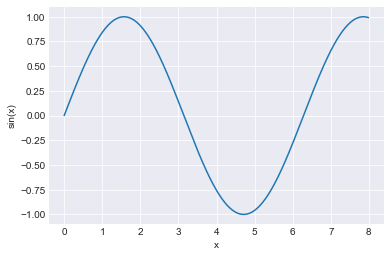

In [43]:
# Check the default styling for Seaborn
import seaborn as sbn
import numpy as np
sbn.set_style("darkgrid")
plt.figure()
plt.plot(np.arange(0, 8, 0.01), np.sin(np.arange(0, 8, 0.01)))
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

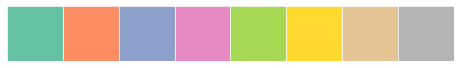

In [44]:
sbn.palplot(sbn.color_palette("Set2", 8))